In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy as cp
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import numpy as np
import csv
import pandas as pd

Read in the metadata from the predictions (only the first 13 columns because I accidentally wrote out to this file twice)

This only reads in the testing dataset, but could also be done with training or validation data

In [9]:
ds = pd.read_csv("../ml_model_data/classification_model/metadata_predict.csv", index_col=0, header=None).iloc[:13].T.to_xarray()
ds

<xarray.Dataset>
Dimensions:                  (index: 15236)
Coordinates:
  * index                    (index) int64 1 2 3 4 5 ... 15233 15234 15235 15236
Data variables: (12/13)
    Time                     (index) object "['2019-07-07T21:00:00.000000000'...
    Lat                      (index) object '[45.29904382]' ... '[33.66246321]'
    Lon                      (index) object '[266.49257108]' ... '[270.742147...
    MESH Fraction            (index) object '[0.]' '[0.]' ... '[0.]' '[0.]'
    mesh_90_mean             (index) object '[nan]' '[nan]' ... '[nan]' '[nan]'
    mesh_90_std              (index) object '[nan]' '[nan]' ... '[nan]' '[nan]'
    ...                       ...
    mesh_90_percentiles_10   (index) object '[nan]' '[nan]' ... '[nan]' '[nan]'
    mesh_90_percentiles_25   (index) object '[nan]' '[nan]' ... '[nan]' '[nan]'
    mesh_90_percentiles_50   (index) object '[nan]' '[nan]' ... '[nan]' '[nan]'
    mesh_90_percentiles_75   (index) object '[nan]' '[nan]' ... '[nan]' '[nan]'
    mesh_90_percentiles_90   (index) object '[nan]' '[nan]' ... '[nan]' '[nan]'
    mesh_90_percentiles_max  (index) object '[nan]' '[nan]' ... '[nan]' '[nan]'

The csv file contains strings of lists of floats, but we just want floats. Isolate just the number section and convert it to a number:

In [12]:
for i in range(ds["MESH Fraction"].values.shape[0]):
    ds["MESH Fraction"].values[i] = float(ds["MESH Fraction"].values[i][1:-1])
    ds["Time"].values[i] = np.datetime64('%s' % ds["Time"].values[i][2:-15])
    ds["Lat"].values[i] = float(ds["Lat"].values[i][1:-1])
    ds["Lon"].values[i] = float(ds["Lon"].values[i][1:-1])
ds["MESH Fraction"].values

array([0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0], dtype=object)

Plot the meshfrac variable

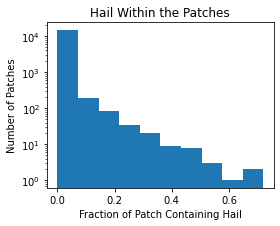

In [14]:
plt.figure(figsize=(4,3.25))
plt.hist(ds["MESH Fraction"].values)
plt.ylabel("Number of Patches")
plt.title("Hail Within the Patches")
plt.xlabel("Fraction of Patch Containing Hail")
plt.yscale("log")
plt.tight_layout()
plt.savefig("histogram_meshfrac_predict.png")

Plot the distribution of the patches in time

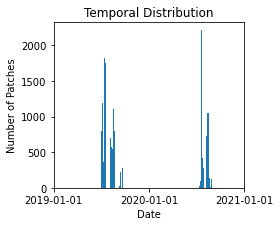

In [15]:
plt.figure(figsize=(4,3.25))
plt.hist(ds["Time"].values, bins=100)
plt.ylabel("Number of Patches")
plt.title("Temporal Distribution")
plt.xlabel("Date")
#plt.yscale("log")
plt.xticks([np.datetime64('2019'),np.datetime64('2020'),np.datetime64('2021')])

plt.tight_layout()
plt.savefig("histogram_time_predict.png")

Plot the distribution of this dataset in space across the CONUS

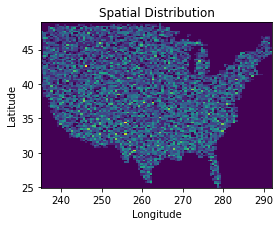

In [16]:
plt.figure(figsize=(4,3.25))
plt.hist2d(ds["Lon"].values,ds["Lat"].values, bins=100)
plt.ylabel("Latitude")
plt.title("Spatial Distribution")
plt.xlabel("Longitude")
plt.tight_layout()
plt.savefig("histogram_space_predict.png")